# Swap KCBS | Playfield 

## Libraries

In [202]:
import numpy as np
import sympy as sp
import sympy.physics.quantum as sq
import sympy.physics.quantum.qubit as sqq
import sympy.physics.quantum.gate as sqg

import matplotlib.pyplot as plt
import networkx as nx

## Inputs

In [1]:
class inputs:
    graphSize = 5
    p = 1/np.sqrt(5)*np.array([1,1,1,1,1])

## The Sympy Part | playground

In [25]:
k0 = sq.Ket('φ')
k1 = sq.Ket('ψ')
superposition = k0+k1; superposition

|φ> + |ψ>

In [26]:
inner_prod = sq.Dagger(superposition)*superposition; inner_prod

(<φ| + <ψ|)*(|φ> + |ψ>)

In [27]:
sq.qapply(inner_prod)

<φ|φ> + <φ|ψ> + <ψ|φ> + <ψ|ψ>

In [28]:
density = sq.qapply(superposition*sq.Dagger(superposition)); density

|φ>*<φ| + |φ>*<ψ| + |ψ>*<φ| + |ψ>*<ψ|

In [31]:
qubit_state = sqq.Qubit('00'); qubit_state

|00>

In [33]:
isinstance(qubit_state,sq.State)

True

In [37]:
gate_operator = sqg.HadamardGate(0); gate_operator

H(0)

In [38]:
isinstance(gate_operator,sq.Operator)

True

In [3]:

a=sqq.Qubit(0)
b=sqq.Qubit(1)

d = sq.qapply(sq.Dagger(a)*b).doit(); d

0

### Playing with classes

In [50]:
class A:
    gla=1

class B:
    glaba=3
    
class C(B,A):
    glow=4

c=C()

print(isinstance(c,A),isinstance(c,B),isinstance(c,C))


True True True


### Preliminary implementation of orthogonormal kets (uses labels)

In [190]:
class onKet(sq.Ket):
#     a=1
    
    #@classmethod
    #this @classmethod descriptor was killing it
    #it was sending the class in "self" instead of the instance in "self"
    #makes sense now
    #I can perhaps use this to set orthogonality relations a little more generally
    def _eval_innerproduct(self,bra,**hints):
        #print(self.label,bra.label)
        if self.label == bra.label:
            return sp.Integer(1)
        else:
            return sp.Integer(0)
    
    @classmethod
    def dual_class(self):
        return onBra
    @property
    def iAm(self):
        return self.label
    
class onBra(sq.Bra):
#     a=2

#     @classmethod
#     def _eval_innerproduct(self,ket,**hints):
#         if self.label == ket.label:
#             return sp.Integer(1)
#         else:
#             return sp.Integer(0)
    
    @classmethod
    def dual_class(self):
        return onKet

In [191]:
a=onKet(0)
b=onKet(1)

In [192]:
c=a+b; c

|0> + |1>

In [193]:
sq.qapply(sq.Dagger(b)*a).doit()

0

In [194]:
d=sq.Dagger(c)*b
sq.qapply(d).doit()

1

### Orthogonal Ket, general orthogonality relation

In [214]:
class onStruct:
    G = nx.Graph()

class onKet(sq.Ket,onStruct):
#     a=1
    #@classmethod
    #this @classmethod descriptor was killing it
    #it was sending the class in "self" instead of the instance in "self"
    #makes sense now
    #I can perhaps use this to set orthogonality relations a little more generally
    def _eval_innerproduct(self,bra,**hints):
        #print(self.label,bra.label)
        if self.label == bra.label:
            return sp.Integer(1)
        else:
            return sp.Integer(0)
    
    @classmethod
    def dual_class(self):
        return onBra
    
    @property
    def iAm(self):
        return self.label
    
class onBra(sq.Bra,onStruct):
#     a=2

#     @classmethod
#     def _eval_innerproduct(self,ket,**hints):
#         if self.label == ket.label:
#             return sp.Integer(1)
#         else:
#             return sp.Integer(0)
    
    @classmethod
    def dual_class(self):
        return onKet

In [218]:
a=onKet(1)
a.label[0]

1

### Playing with networks

In [197]:
G = nx.Graph()
G.add_node(1)

In [201]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([[1,2],[2,3],[3,4],[4,5],[5,1]])

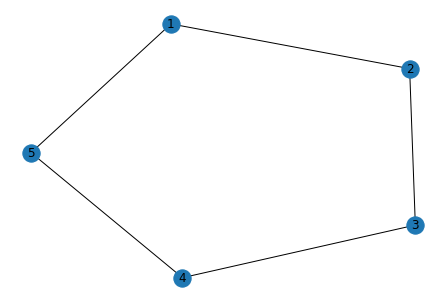

In [205]:
%matplotlib inline 
nx.draw(G, with_labels=True)

In [212]:
3 in G[1]

False